In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
df=pd.read_csv("spotify dataset.csv", encoding='ISO-8859-1', low_memory=False)

In [95]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


some basic information about the data

In [7]:
df.shape

(170638, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170638 entries, 0 to 170637
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170638 non-null  float64
 1   year              170638 non-null  int64  
 2   acousticness      170638 non-null  float64
 3   artists           170638 non-null  object 
 4   danceability      170638 non-null  float64
 5   duration_ms       170638 non-null  int64  
 6   energy            170638 non-null  float64
 7   explicit          170638 non-null  int64  
 8   id                170638 non-null  object 
 9   instrumentalness  170638 non-null  float64
 10  key               170638 non-null  int64  
 11  liveness          170638 non-null  float64
 12  loudness          170638 non-null  float64
 13  mode              170638 non-null  int64  
 14  name              170638 non-null  object 
 15  popularity        170638 non-null  object 
 16  release_date      17

# Data Preprocessing

### Data Cleaning

In [11]:
df.isnull().sum()

valence                  0
year                     0
acousticness             0
artists                  0
danceability             0
duration_ms              0
energy                   0
explicit                 0
id                       0
instrumentalness         0
key                      0
liveness                 0
loudness                 0
mode                     0
name                     0
popularity               0
release_date             0
speechiness              0
tempo                  546
Unnamed: 19         170631
Unnamed: 20         170633
Unnamed: 21         170633
Unnamed: 22         170633
Unnamed: 23         170633
Unnamed: 24         170633
Unnamed: 25         170633
Unnamed: 26         170633
Unnamed: 27         170633
Unnamed: 28         170633
Unnamed: 29         170633
Unnamed: 30         170635
dtype: int64

<Axes: >

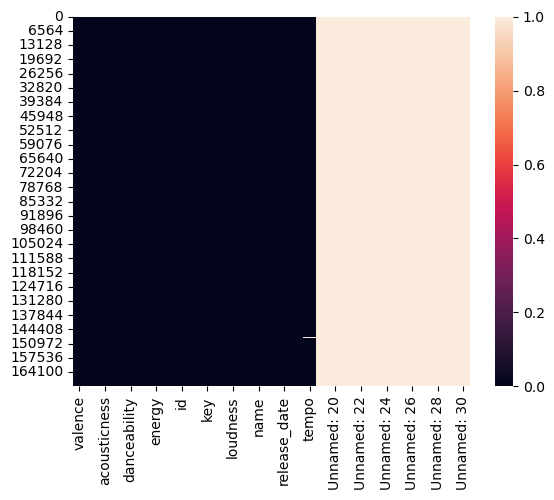

In [16]:
sns.heatmap(df.isnull(),cbar='False')

In [252]:
#delete all the Unnamed columns from the data
df=df.drop(columns=[col for col in df.columns if 'Unnamed' in col])

In [21]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [20]:
df.shape

(170638, 19)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
valence,170638.0,0.528590,0.263168,0.0,0.3170,0.540000,0.74700,1.000
year,170638.0,1976.785265,25.917277,1921.0,1956.0000,1977.000000,1999.00000,2020.000
acousticness,170638.0,0.502124,0.376034,0.0,0.1020,0.516000,0.89300,0.996
danceability,170638.0,0.537393,0.176133,0.0,0.4150,0.548000,0.66800,0.988
duration_ms,170638.0,230945.123068,126119.657677,5108.0,169827.0000,207456.500000,262400.00000,5403500.000
energy,170638.0,0.482383,0.267648,0.0,0.2550,0.471000,0.70300,1.000
explicit,170638.0,0.084571,0.278243,0.0,0.0000,0.000000,0.00000,1.000
instrumentalness,170638.0,0.167010,0.313475,0.0,0.0000,0.000216,0.10200,1.000
key,170638.0,5.199838,3.515076,0.0,2.0000,5.000000,8.00000,11.000
liveness,170638.0,0.205845,0.174809,0.0,0.0988,0.136000,0.26100,1.000


In [24]:
print(df.count())

valence             170638
year                170638
acousticness        170638
artists             170638
danceability        170638
duration_ms         170638
energy              170638
explicit            170638
id                  170638
instrumentalness    170638
key                 170638
liveness            170638
loudness            170638
mode                170638
name                170638
popularity          170638
release_date        170638
speechiness         170638
tempo               170092
dtype: int64


<Axes: xlabel='tempo', ylabel='Count'>

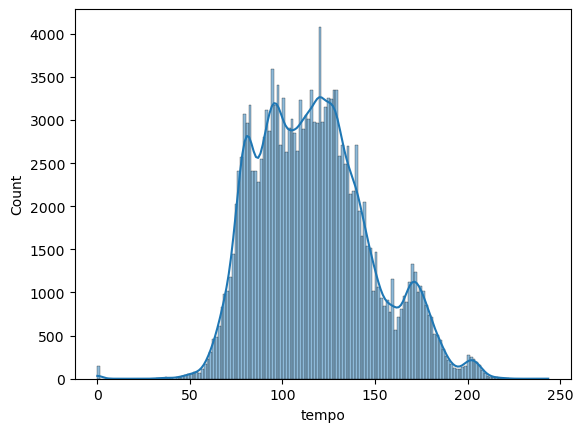

In [26]:
sns.histplot(df['tempo'].dropna(),kde=True)

In [254]:
#fill missing values in column tempo with median(distribution is skewed)
df['tempo']=df['tempo'].fillna(df['tempo'].median())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170638 entries, 0 to 170637
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170638 non-null  float64
 1   year              170638 non-null  int64  
 2   acousticness      170638 non-null  float64
 3   artists           170638 non-null  object 
 4   danceability      170638 non-null  float64
 5   duration_ms       170638 non-null  int64  
 6   energy            170638 non-null  float64
 7   explicit          170638 non-null  int64  
 8   id                170638 non-null  object 
 9   instrumentalness  170638 non-null  float64
 10  key               170638 non-null  int64  
 11  liveness          170638 non-null  float64
 12  loudness          170638 non-null  float64
 13  mode              170638 non-null  int64  
 14  name              170638 non-null  object 
 15  popularity        170638 non-null  object 
 16  release_date      17

### Data Type Conversion and Categorical Encoding



In [256]:
#Convert 'popularity' to numeric 
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')


In [258]:
#Label encoding for 'release_date'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['release_date_encoded'] = le.fit_transform(df['release_date'])


In [260]:
# Frequency Encoding for 'artist'
artist_freq = df['artists'].value_counts().to_dict()
df['artists_encoded'] = df['artists'].map(artist_freq)

# Drop the original 'artist' column
df = df.drop(columns=['artists'])


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170638 entries, 0 to 170637
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   valence               170638 non-null  float64
 1   year                  170638 non-null  int64  
 2   acousticness          170638 non-null  float64
 3   danceability          170638 non-null  float64
 4   duration_ms           170638 non-null  int64  
 5   energy                170638 non-null  float64
 6   explicit              170638 non-null  int64  
 7   id                    170638 non-null  object 
 8   instrumentalness      170638 non-null  float64
 9   key                   170638 non-null  int64  
 10  liveness              170638 non-null  float64
 11  loudness              170638 non-null  float64
 12  mode                  170638 non-null  int64  
 13  name                  170638 non-null  object 
 14  popularity            170169 non-null  float64
 15  

### Outlier Detection & Handling

#### Boxplot Visualization for Outlier Detection in Music Features

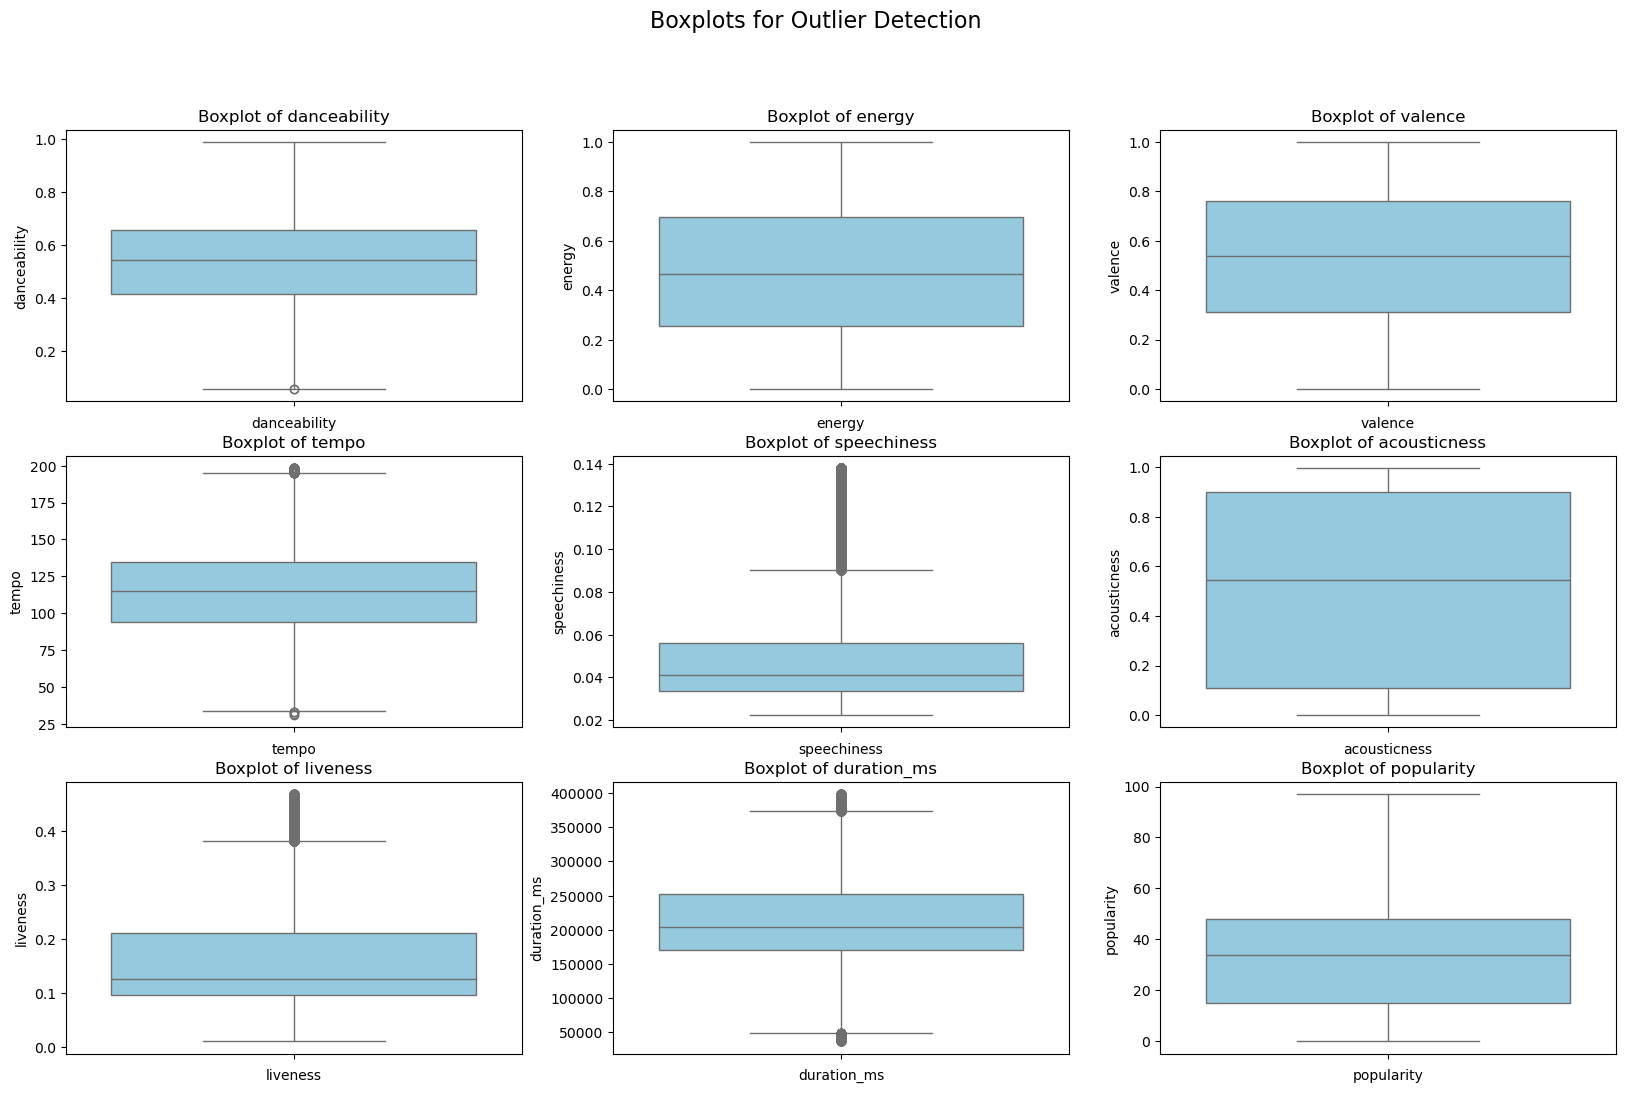

In [47]:
features = ['danceability', 'energy', 'valence', 'tempo', 'speechiness', 'acousticness', 'liveness', 'duration_ms', 'popularity']

plt.figure(figsize=(20, 12))
plt.suptitle('Boxplots for Outlier Detection', fontsize=16)

# Plot each feature as a boxplot
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(data=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)



In [178]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f'{feature}: Removing values outside [{lower_bound:.2f}, {upper_bound:.2f}]')
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [180]:
# Remove outliers for each feature
outlier_features = ['tempo', 'speechiness', 'liveness', 'duration_ms', 'popularity']
for feature in outlier_features:
    df = remove_outliers(df, feature)
    

tempo: Removing values outside [30.60, 198.35]
speechiness: Removing values outside [-0.03, 0.14]
liveness: Removing values outside [-0.13, 0.47]
duration_ms: Removing values outside [37172.50, 398240.50]
popularity: Removing values outside [-34.50, 97.50]


In [114]:
# Check dataset shape after cleaning
print(f"Dataset shape after outlier removal: {df.shape}")

Dataset shape after outlier removal: (127497, 21)


### Feature scaling

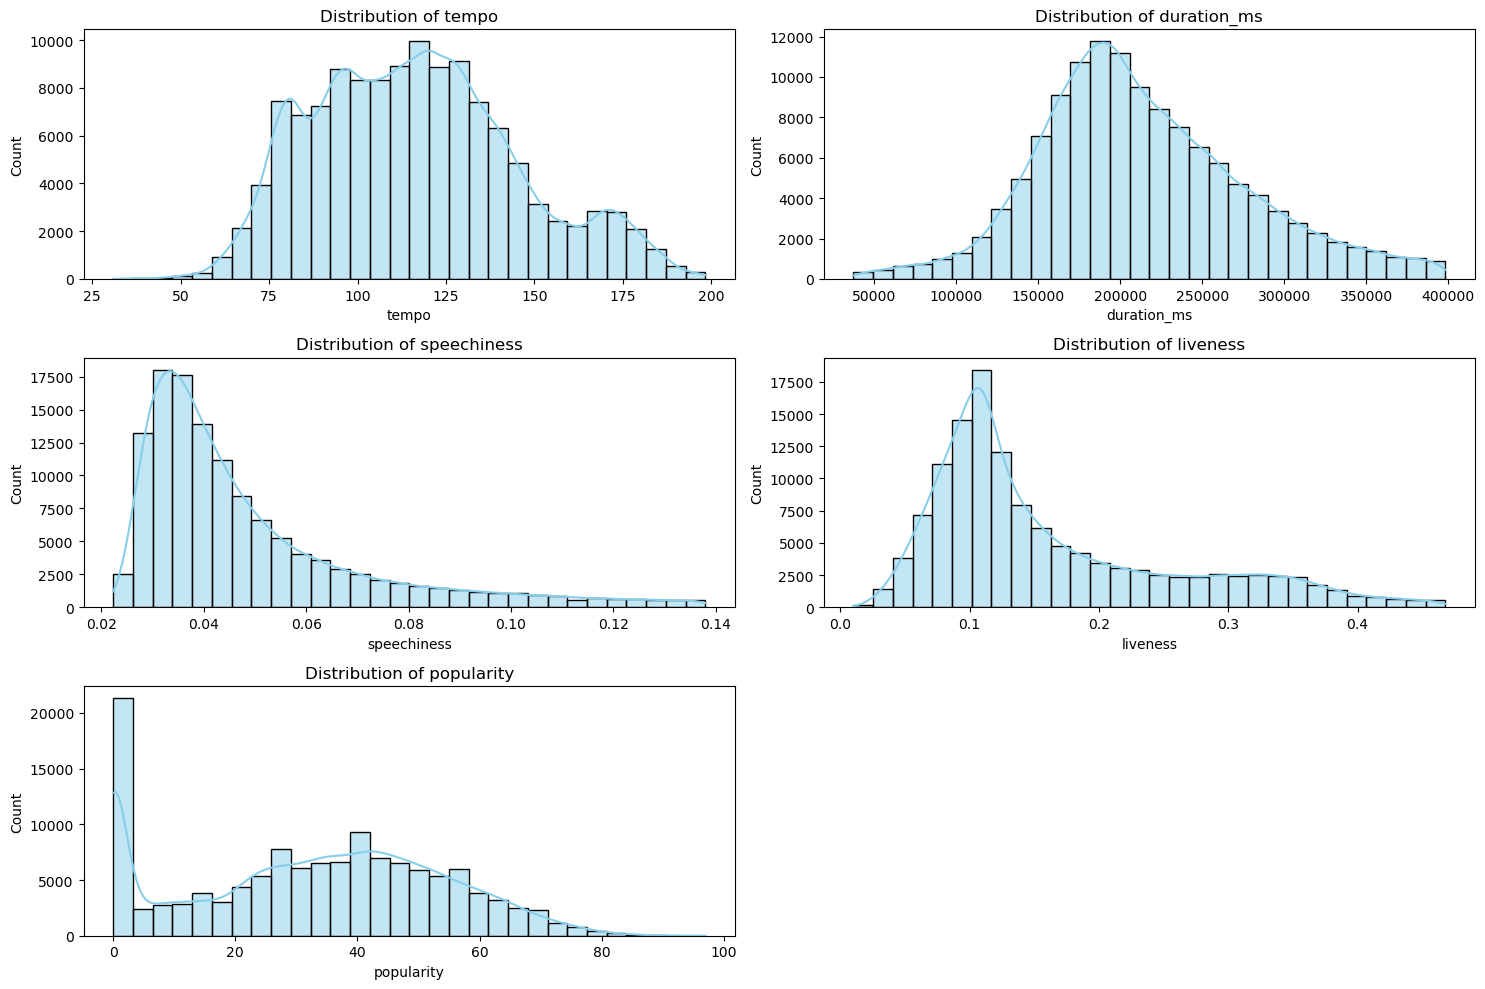

In [45]:
features = ['tempo', 'duration_ms', 'speechiness', 'liveness', 'popularity']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

After examining the distributions of features, it’s clear that these variables exhibit non-normal, often skewed distributions with wide or bounded ranges. Using Min-Max Scaling is ideal in this context because it rescales each feature into the [0, 1] range while preserving the inherent distribution shape.

In [182]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale =['tempo','duration_ms', 'speechiness', 'liveness', 'popularity']
scaled_data = scaler.fit_transform(df[columns_to_scale])

scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
# Replace original columns with scaled values
df[columns_to_scale] = scaled_df


In [184]:
df.shape

(127497, 21)

### Feature Selection

Correlation Analysis for Feature Selection: Identifying and Removing Highly Correlated Features

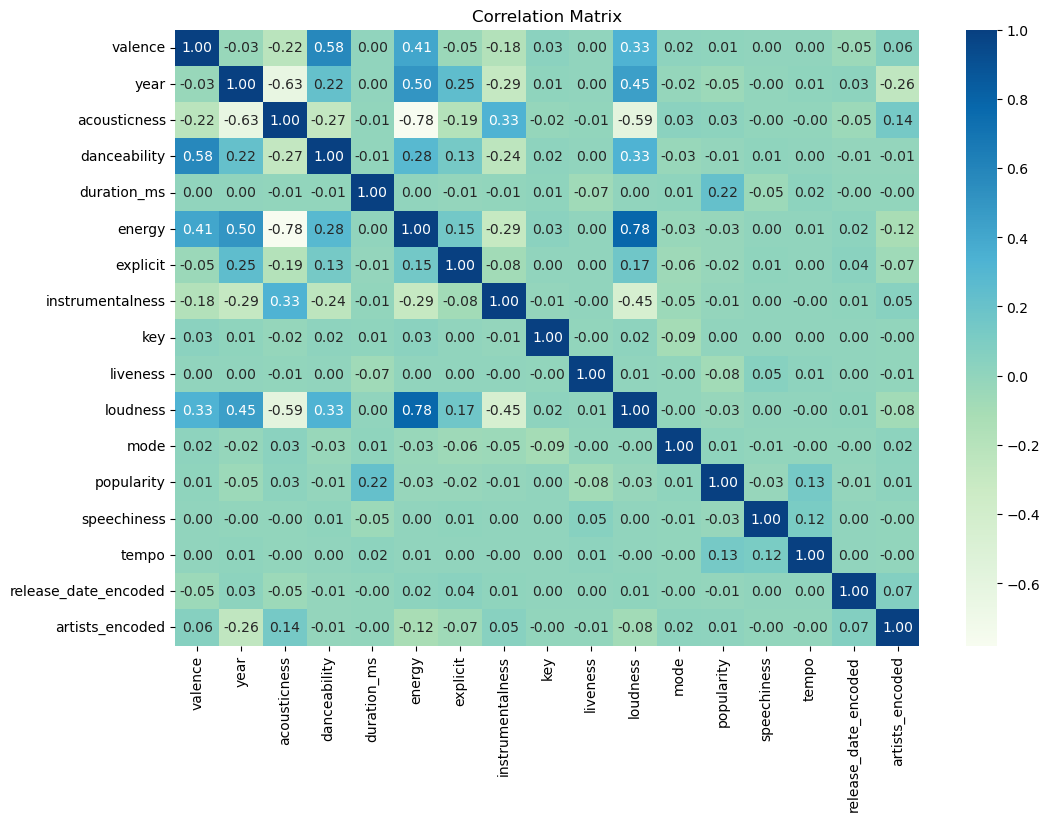

In [194]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['number', 'float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [196]:
# Identify pairs of highly correlated features 
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly correlated features to remove:", highly_correlated_features)


Highly correlated features to remove: set()


### Splitting the Dataset for Training and Testing

splitting data for trend analysis

In [208]:
from sklearn.model_selection import train_test_split

In [210]:
X = df.drop(columns=['popularity'])  
y = df['popularity'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [212]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (101997, 20)
X_test shape: (25500, 20)
y_train shape: (101997,)
y_test shape: (25500,)
